# Atividade 4 - Arthur Cerveira
## Exercício 1 -  Filtragem Espacial - Suaviza

O exercício 1 consiste na implementação de uma função que suavize uma imagem através da aplicação de uma convulação com uma máscara pré-definida. Após aplicar as operações na imagem, é possível observar que a imagem resultante é mais suave que a original, embora seja também mais borrada.

Abaixo está a imagem original e a implementação da função.

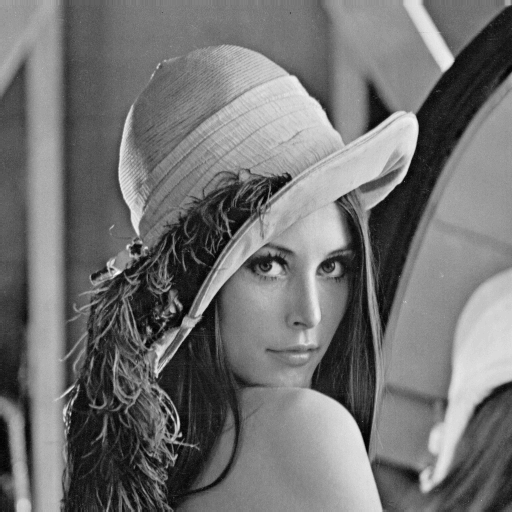

In [1]:
lenna = imread('./images/lena_cinza.bmp');
imshow(lenna);

In [2]:
function imagem_suavizada = suaviza (image_path)
    image = imread(strcat('images/', image_path));
    [width, height] = size(image);
    
    filter = [1, 2, 1;
              2, 4, 2;
              1, 2, 1];
    total = sum(sum(filter));
    
    % Fill image with zeros
    image = [zeros(width, 1), image, zeros(width, 1)];
    % Transpose matrix, add zeros, transpose back
    image = [zeros(height + 2, 1), image', zeros(height + 2, 1)]';
    
    imagem_suavizada = zeros(width, height, "uint8");
    
    for i = (1:width)
        for j = (1:height)
            window = image(i:i+2, j:j+2);
            soma = 0;
            
            for k = (1:3)
                for l = (1:3)
                    soma = soma + double((window(k, l) * filter(k, l)) / total);
                endfor
            endfor
            
            imagem_suavizada(i, j) = soma;
        endfor
    endfor 
endfunction

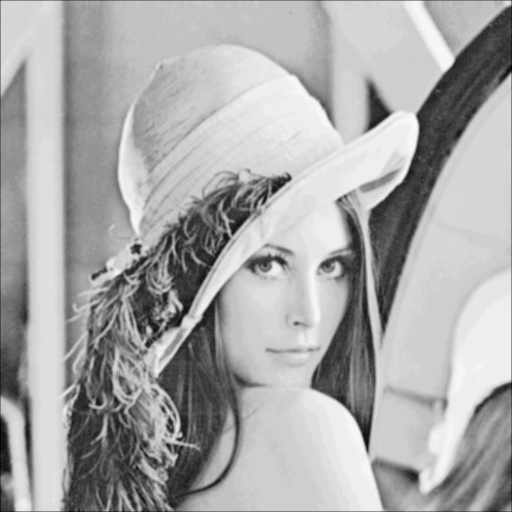

In [3]:
img = suaviza("lena_cinza.bmp");
imshow(img);

## Exercício 2 -  Filtragem Espacial - Mediana

O exercício 1 consiste na implementação de uma função que reduza o ruído sal e pimenta de uma imagem através da aplicação de um filtro espacial de mediana. Pode-se observar que essa função apresentou um bom resultado para esse tipo de ruído.

Abaixo está a imagem com ruído e a implementação da função.

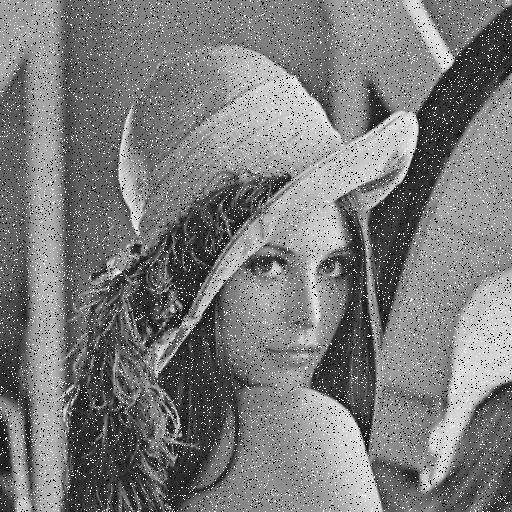

In [4]:
lenna_sal = imread('./images/lena_sal_e_pimenta.jpg');
imshow(lenna_sal);

In [5]:
function figura_out = restaura_mediana(figura_in)
    image = imread(strcat('images/', figura_in));
    [width, height] = size(image);

    % Fill image with zeros
    image = [zeros(width, 1), image, zeros(width, 1)];
    % Transpose matrix, add zeros, transpose back
    image = [zeros(height + 2, 1), image', zeros(height + 2, 1)]';

    figura_out = zeros(width, height, "uint8");

    for i = (1:width)
        for j = (1:height)
            window = image(i:i+2, j:j+2);
            
            % Flatten the window
            window = reshape(window',1,[]);

            figura_out(i, j) = median(window);
        endfor
    endfor 
endfunction

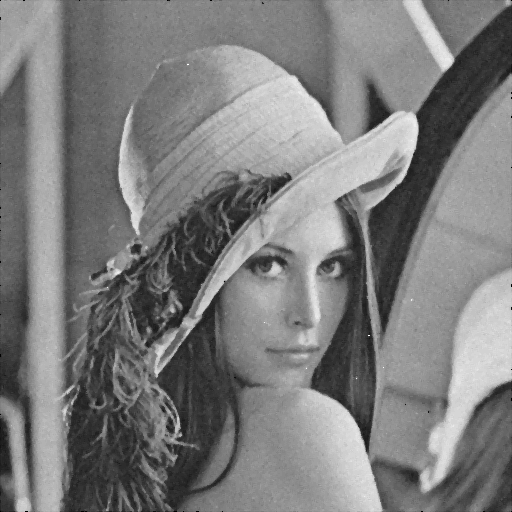

In [6]:
img = restaura_mediana("lena_sal_e_pimenta.jpg");
imshow(img);

## Exercício 3 -  Filtragem Espacial - Realce

O exercício 3 consiste na implementação de uma função que realce imagens em tescala de cinzas através da aplicação de uma convolução com uma máscara Laplaciana. Foi aproveitado o corpo da função de suavização para a implementação do realce. Como resultados, a imagem resultante, e a diferença entre este resultado e a imagem original são exibidas abaixo.

Abaixo está a implementação da função.

In [7]:
function imagem_realcada = realce(imagem)
    image = imread(strcat('images/', imagem));
    [width, height] = size(image);
    
    filter = [0,  1, 0;
              1, -4, 1;
              0,  1, 0];
    
    % Fill image with zeros
    image = [zeros(width, 1), image, zeros(width, 1)];
    % Transpose matrix, add zeros, transpose back
    image = [zeros(height + 2, 1), image', zeros(height + 2, 1)]';
    
    imagem_realcada = zeros(width, height, "uint8");
    
    for i = (1:width)
        for j = (1:height)
            window = image(i:i+2, j:j+2);
            soma = 0;
            
            for k = (1:3)
                for l = (1:3)
                    soma = soma + (window(k, l) * filter(k, l));
                endfor
            endfor
            
            imagem_realcada(i, j) = soma;
        endfor
    endfor 
endfunction

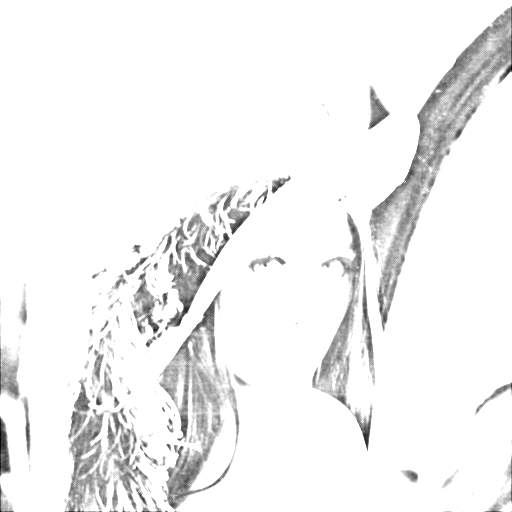

In [8]:
img = realce("lena_cinza.bmp");

imshow(img);

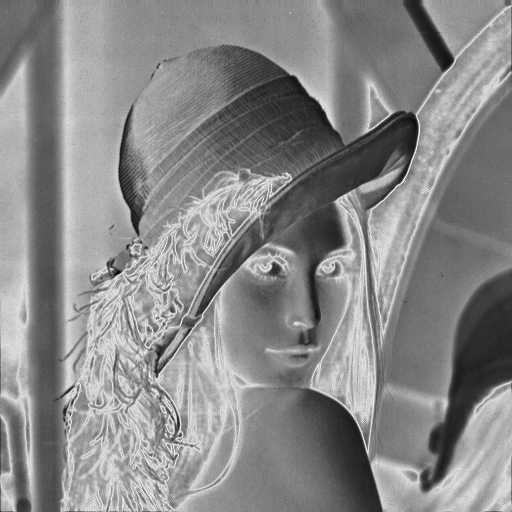

In [9]:
imshow(abs(img - lenna));

## Exercício 4 -  Filtragem Espacial

O exercício 4 consiste na utilização da função `filter2` para realizar as operações implementadas anteriormente. Não consegui identificar como aplicar a mediana não função de filtro de suavização 2. A diferença entre os resultados obtidos nas funções implementadas manualmente diferem dos resultados da função `filter2`, indicando alguma possível irregularidade em suas implementações.

### Suavização (utilizando a mesma máscara/filtro do exercícios 1)

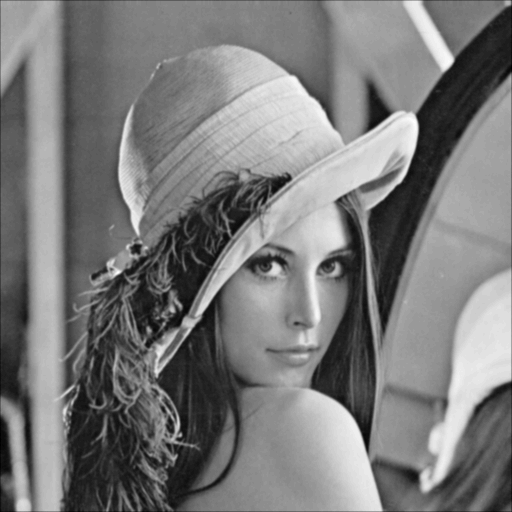

In [10]:
filter = [1, 2, 1;
          2, 4, 2;
          1, 2, 1];


Y = filter2(filter,lenna);
imshow(Y);

### Suavização (Utilizando a mesma máscara/ filtro mediana do exercício 2)

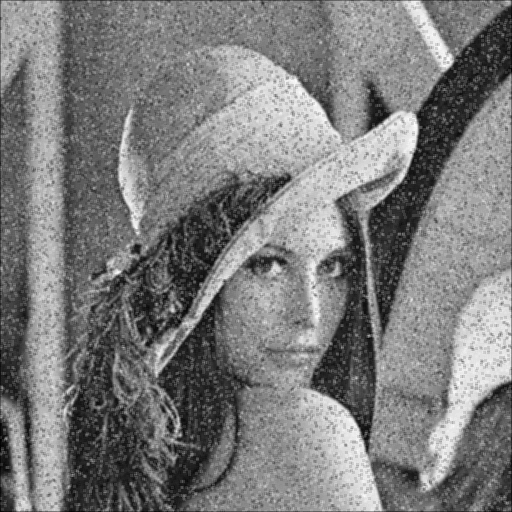

In [11]:
filter = [1, 1, 1;
          1, 1, 1;
          1, 1, 1];


Y = filter2(filter,lenna_sal);
imshow(Y);

### Realce (utilizando a mesma máscara/filtro do exercícios 3)

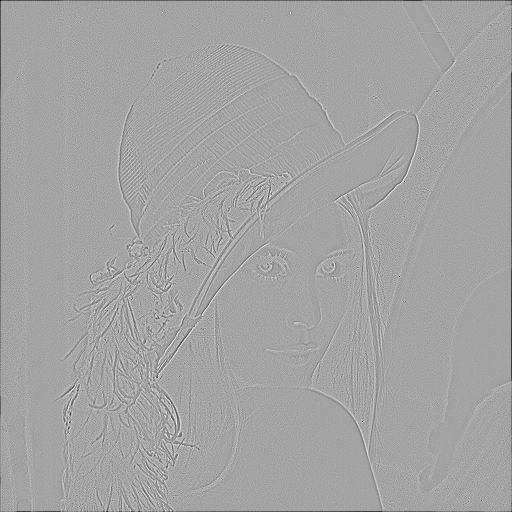

In [12]:
filter = [0,  1, 0;
          1, -4, 1;
          0,  1, 0];


Y = filter2(filter,lenna);
imshow(Y);

### Filtro passa-baixas

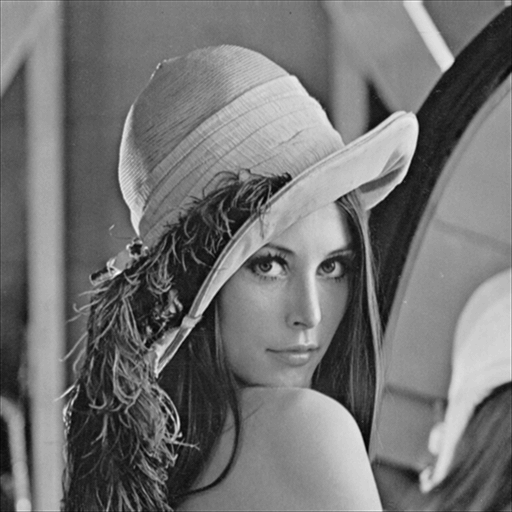

In [13]:
filter = [0, 0, -4, 0, 0;
          0, 0, 10, 0, 0;
          -4, 10, 20, 10, -4;
          0, 0, 10, 0, 0;
          0, 0, -4, 0, 0];


Y = filter2(filter,lenna);
imshow(Y);